0.8090169943749475


<IPython.core.display.Javascript object>


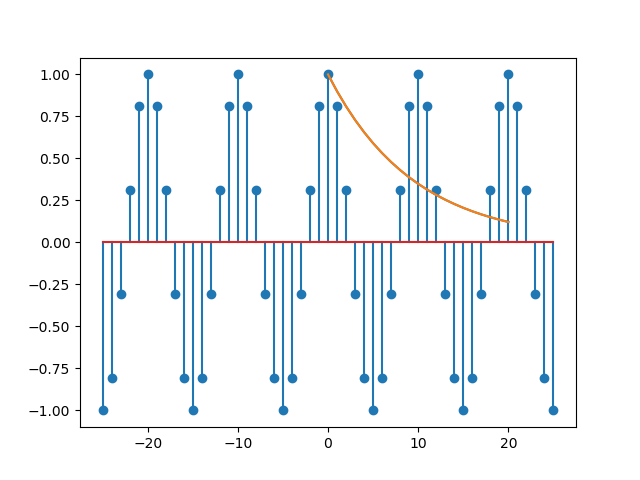

<StemContainer object of 3 artists>

In [99]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as mpt

interval = 51
ref = interval // 2
x = np.arange(-ref, ref + (0 if interval % 2 == 0 else 1), 1)
f = 1
Fs = 10 * f
w = 2 * np.pi * f
y = np.cos((w/Fs) * x )
print(y[ref + 1])

mpt.stem(x, y)

<IPython.core.display.Javascript object>


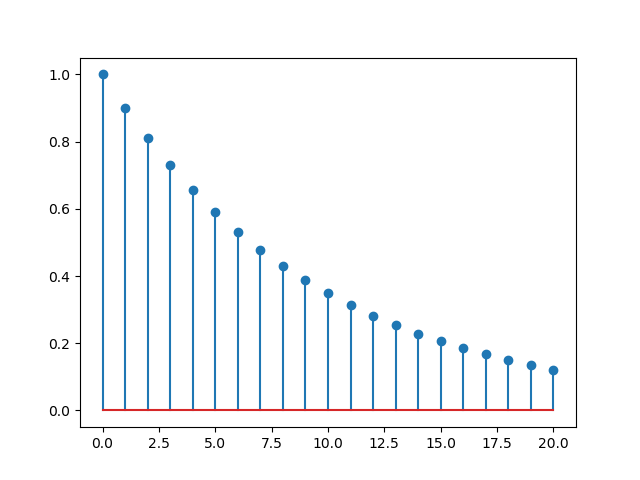

<StemContainer object of 3 artists>

In [117]:
n = np.arange(0, 21, 1)
y = 0.9 ** n
mpt.figure()
mpt.stem(n, y)

Sample rate:  44100
Sample data type:  int16
Data shape:  (485100, 2)
Duration 11.0
Memory usage:  1940400


<IPython.core.display.Javascript object>


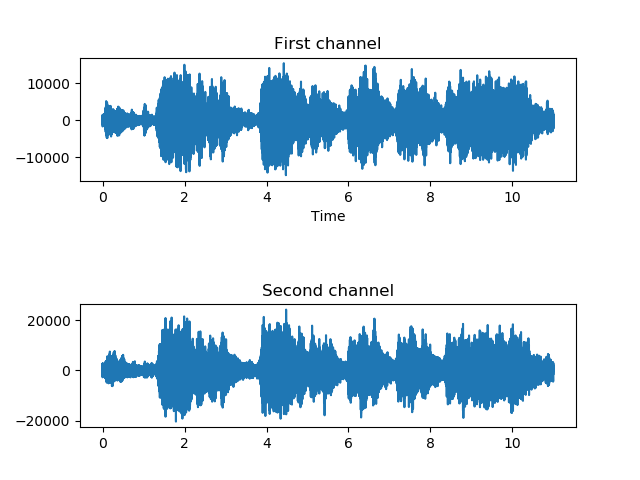

Text(0.5, 1.0, 'Second channel')

In [103]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as mpt
import scipy.io.wavfile as wavfile
import sounddevice as sd
import numpy as np

sampleRate, data = wavfile.read("handel44100.wav")
print("Sample rate: ", sampleRate)
print("Sample data type: ", data.dtype)
print("Data shape: ", data.shape)
print("Duration", data.shape[0] / sampleRate)
print("Memory usage: ", data.nbytes)

x = np.linspace(0, 11, data.shape[0])
ch1 = data[:,0]
ch2 = data[:, 1]
mpt.figure()
mpt.subplots_adjust(hspace = 1)
mpt.subplot(2, 1, 1)
mpt.plot(x, ch1)
mpt.title("First channel")
mpt.xlabel("Time")
mpt.subplot(2, 1, 2)
mpt.plot(x, ch2)
mpt.title("Second channel")

Size:  80
Periods included in buffer:  4.0


<IPython.core.display.Javascript object>


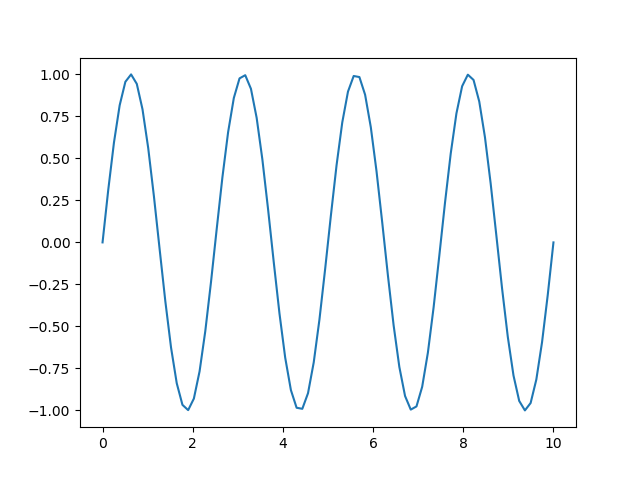

<IPython.core.display.Javascript object>


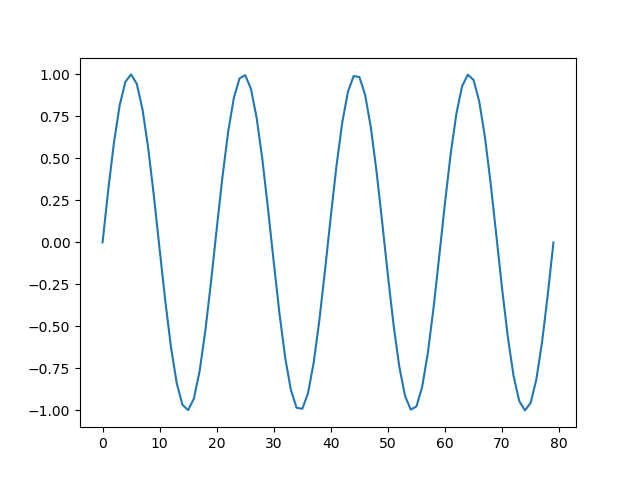

<IPython.core.display.Javascript object>


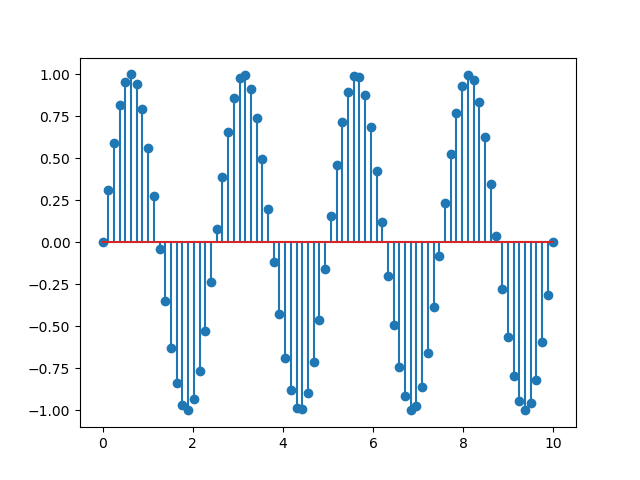

<IPython.core.display.Javascript object>


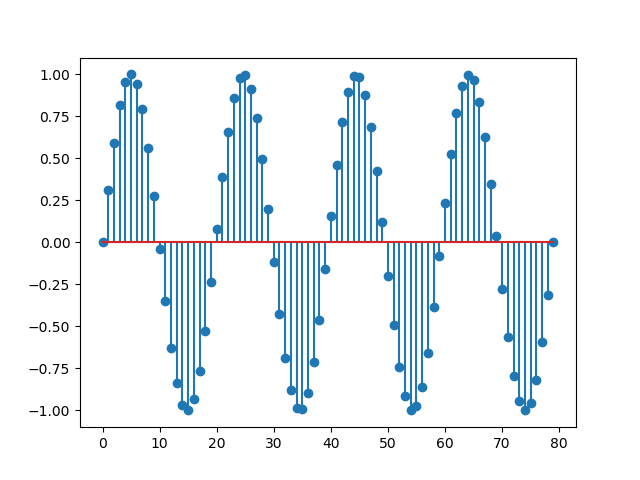

<StemContainer object of 3 artists>

In [56]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot
import sounddevice as sd

def sinus(A, F_0, phi, t_start, t_end, F_s):
    t = np.linspace(t_start, t_end ,round((t_end - t_start) * F_s))
    s = A * np.sin(2 * np.pi * F_0 * t + phi)
    return (s, t)

F_s = 8000
A = 1
F_0 = 400
length = 0.010
phi = 0 * np.pi / 180
s, t = sinus(A, F_0, phi, 0, length, F_s)

tMs = t * 1000
print("Size: ", s.size)
print("Periods included in buffer: ", (s.size / F_s) * F_0)

pyplot.figure()
pyplot.plot(tMs, s)
pyplot.figure()
pyplot.plot(s)
pyplot.figure()
pyplot.stem(tMs, s)
pyplot.figure()
pyplot.stem(s)


In [64]:
import numpy as np

def convolution(x, h):
    resSize = x.size + h.size - 1
    res = np.zeros(resSize)
    
    extendX = np.concatenate((np.zeros(h.size - 1), x, np.zeros(h.size - 1)))
    for n in range(resSize):
        res[n] = extendX[n: n + h.size].dot(h[::-1])
        
    return res

y = convolution(np.array([0, 1, 1 / 2, 1 / 3, 5, 2]), np.array([1, 1, 0]))
print(y)
print(y.size)

8
[0.         1.         1.5        0.83333333 5.33333333 7.
 2.         0.        ]
8
